In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, MaxPooling2D, BatchNormalization, LeakyReLU
from keras.layers import Convolution2D
from keras.layers import AveragePooling2D
from keras.layers import UpSampling2D
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Input
from keras.optimizers import Adam
from utils import *
import keras.backend as K
from glob import glob

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
K.set_session(sess)

In [3]:
data = glob("./data/test_img_slices/*.ra")
minv, maxv = 0, 0
#for i in range(len(data)):
#    img = get_image_old2(data[i])
#    minv = min(minv, np.min(img[:, :, 0]))
#    maxv = max(maxv, np.max(img[:, :, 0]))
#print(minv, maxv)

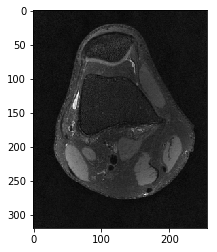

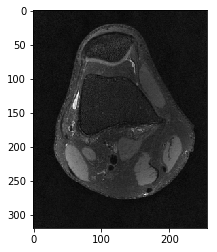

-1.0 1.0


In [4]:
img = get_image_old2(data[0]) 
plt.imshow(img[:, :, 0], cmap='gray')
plt.show()
minv = np.min(img[:, :, 0])
maxv = np.max(img[:, :, 0])
#plt.imshow(-1 + (2 * np.array(img[:, :, 0]) / (maxv - minv)), cmap='gray')
normalized_img = np.expand_dims(-1 + (2 * (np.array(img[:, :, 0] - minv) / (maxv - minv))), 2)
plt.imshow(normalized_img[:, :, 0], cmap='gray')
plt.show()
minv = np.min(normalized_img[:, :, 0])
maxv = np.max(normalized_img[:, :, 0])
print(minv, maxv)

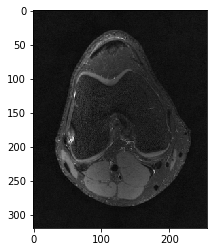

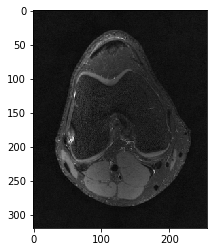

-1.0 1.0


In [5]:
img2 = get_image_old2(data[70])
plt.imshow(img2[:, :, 0], cmap='gray')
plt.show()
minv = np.min(img2[:, :, 0])
maxv = np.max(img2[:, :, 0])
#plt.imshow(-1 + (2 * np.array(img[:, :, 0]) / (maxv - minv)), cmap='gray')
normalized_img2 = np.expand_dims(-1 + (2 * (np.array(img2[:, :, 0] - minv) / (maxv - minv))), 2)
plt.imshow(normalized_img2[:, :, 0], cmap='gray')
plt.show()
minv = np.min(normalized_img2[:, :, 0])
maxv = np.max(normalized_img2[:, :, 0])
print(minv, maxv)

c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


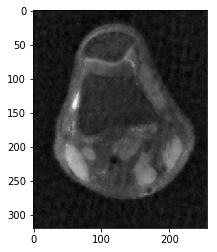

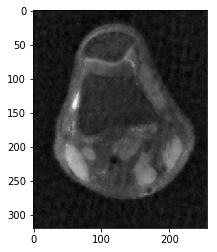

-1.0
1.0


In [6]:
mask_files = glob("./masks/gen_masks/6_*")
mask_files = [np.fft.fftshift(np.load(m)) for m in mask_files]
mask = mask_files[0]
new_img = np.fft.ifft2(np.multiply(np.fft.fft2(normalized_img[:, :, 0]), mask)).astype(float)
plt.imshow(new_img, cmap='gray')
plt.show()
minv = np.min(new_img)
maxv = np.max(new_img)
normalized_new_img = np.expand_dims(-1 + (2 * (new_img - minv) / (maxv - minv)), 2)
plt.imshow(normalized_new_img[:, :, 0], cmap='gray')
plt.show()
print(np.min(normalized_new_img))
print(np.max(normalized_new_img))

In [7]:

encoding_size = 16*20 # 128
perturbation_max = 40

In [8]:

preprocess = lambda x : x / 127 - 1
deprocess  = lambda x :((x + 1) * 127).astype(np.uint8)

In [9]:
#img = np.array(PIL.Image.open('dog.png'))
#preproc_img = preprocess(img)
image_shape = normalized_img.shape
#plt.imshow(deprocess(preproc_img))
print(image_shape)

(320, 256, 1)


In [10]:
#corruption = np.random.randint(-perturbation_max, perturbation_max, size = image_shape)
#corrupted_img = (img + corruption).clip(0, 255)
#preproc_corrupted_img = preprocess(corrupted_img)
#plt.imshow(deprocess(preproc_corrupted_img))

In [11]:

encoder = Sequential([
    Convolution2D(8, 3, padding = 'same', input_shape = (320, 256, 1)), #128, 128, 3
    MaxPooling2D(padding='same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1),
    Activation('relu'), 
    Convolution2D(8, 3, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'), 
    Activation('relu'), 
    Convolution2D(16, 3, padding = 'same'),
    MaxPooling2D(padding='same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'), 
    Activation('relu'), 
    Convolution2D(16, 3, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(32, 3, padding = 'same'),
    MaxPooling2D(padding='same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(32, 3, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(64, 3, padding = 'same'),   
    MaxPooling2D(padding='same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(64, 3, padding = 'same'),   
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(128, 3, padding = 'same'),
    MaxPooling2D(padding='same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(128, 3, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Flatten(),
    Dense(encoding_size, activation = 'tanh')
])

In [19]:
decoder = Sequential([
    # Dense(192, input_shape = (encoding_size,), activation = 'relu'),
    Reshape((20, 16, 1), input_shape = (encoding_size,)),
    #BatchNormalization(),
    Convolution2D(128, 3, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(128, 1, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    UpSampling2D(),
    #BatchNormalization(),
    Convolution2D(64, 3, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(64, 1, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    UpSampling2D(),
    #BatchNormalization(),
    Convolution2D(32, 3, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(32, 1, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    UpSampling2D(),
    #BatchNormalization(),
    Convolution2D(16, 3, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    Convolution2D(16, 1, padding = 'same'),
    #BatchNormalization(),
    #LeakyReLU(alpha=0.1), #Activation('relu'),
    Activation('relu'), 
    UpSampling2D(),
    #BatchNormalization(),
    Convolution2D(1, 3, padding = 'same'),
    #BatchNormalization(),
    Activation('tanh')
])

In [20]:
# not squeeze, multiply, cast
def recon_loss(y_true, y_pred):
    mask_files = glob("./masks/gen_masks/6_*")
    mask_files = [np.fft.fftshift(np.load(m)) for m in mask_files]
    mask = mask_files[0]
    y_pred = tf.squeeze(y_pred, axis=[0, 3])
    fft_img = tf.fft2d(tf.cast(y_pred, dtype=tf.complex64))
    masked = tf.multiply(fft_img, mask)
    ifft = tf.cast(tf.ifft2d(masked), dtype=tf.float32)
    squeeze_ifft = ifft #tf.squeeze(ifft, axis=0)
    squeeze_ytrue = tf.squeeze(y_true, axis=[0, 3])
    #print(K.shape(squeeze_ifft))
    #print(K.shape(squeeze_ytrue))
    #return K.mean(K.abs(squeeze_ifft - squeeze_ytrue), axis=-1) # + 0.0000000001 * tf.norm(tf.reshape(squeeze_ifft, [-1]), ord=1) #+ 0.0000001 * tf.image.total_variation(tf.expand_dims(squeeze_ifft, -1))
    return K.mean(K.square(squeeze_ifft - squeeze_ytrue), axis=-1) # + 0.0000000001 * tf.norm(tf.reshape(squeeze_ifft, [-1]), ord=1) #+ 0.0000001 * tf.image.total_variation(tf.expand_dims(squeeze_ifft, -1))

In [25]:
def mse_orig(y_true, y_pred):
    return K.mean(y_pred)
autoencoder = Sequential([
    encoder, 
    decoder
])
autoencoder.compile(Adam(1e-3), loss = recon_loss) # loss = recon_loss # loss = 'mse'

In [26]:
base_image = np.random.random(size = (1, ) + image_shape) * 2 - 1
#corrupted_img_batch = np.expand_dims(normalized_img, 0) # FOR ORIGINAL 
#corrupted_img_batch = np.expand_dims(normalized_img2, 0) # FOR ORIGINAL (img 2)

corrupted_img_batch = np.expand_dims(normalized_new_img, 0) # FOR SUBSAMPLED
fit_params = {
    'x': base_image,
    'y': corrupted_img_batch, 
    'epochs': 50,
    'batch_size': 1,
    'verbose': 0
}

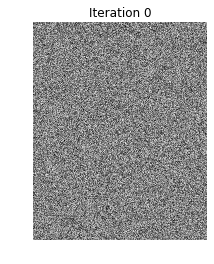

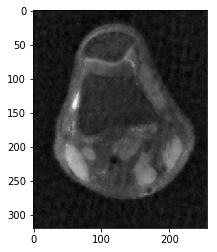

MSE Orig:  0.014515843088569907
MSE Corrupt:  0.004343113461096563


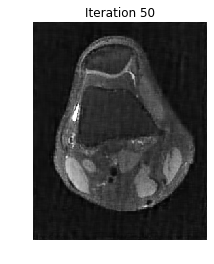

MSE Orig:  0.01455610764322656
MSE Corrupt:  0.0044318592258196406


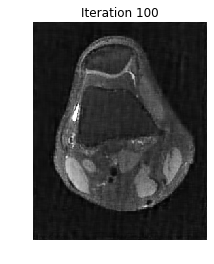

MSE Orig:  0.014442221125730417
MSE Corrupt:  0.004478750125285839


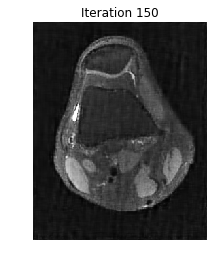

MSE Orig:  0.014635748725524611
MSE Corrupt:  0.004532211703653191


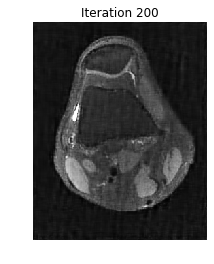

MSE Orig:  0.014418374750638781
MSE Corrupt:  0.0045508131615776114


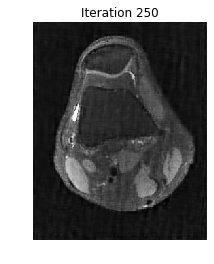

MSE Orig:  0.014938865846353871
MSE Corrupt:  0.004575839751264341


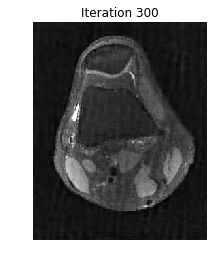

MSE Orig:  0.012864026896602982
MSE Corrupt:  0.004660754970352571


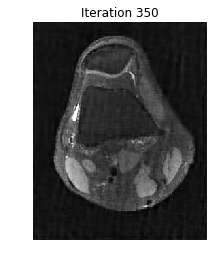

MSE Orig:  0.01460537283243904
MSE Corrupt:  0.004610601687021492


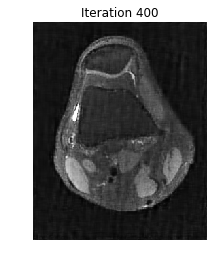

MSE Orig:  0.015246474807733251
MSE Corrupt:  0.004651012985065971


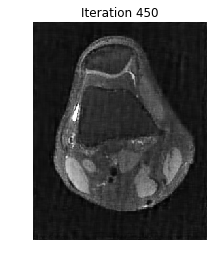

MSE Orig:  0.015002952024909103
MSE Corrupt:  0.004645340074741677


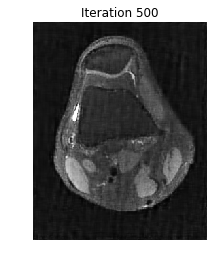

MSE Orig:  0.014386452813411364
MSE Corrupt:  0.004611113201966549


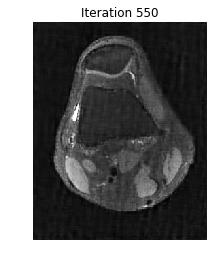

MSE Orig:  0.012803642511617173
MSE Corrupt:  0.0042268839743133165


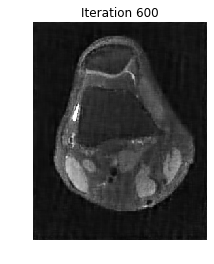

MSE Orig:  0.014420395974538303
MSE Corrupt:  0.004344227531260207


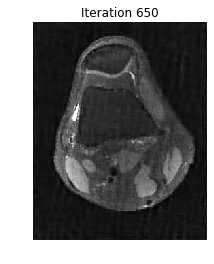

MSE Orig:  0.014625411536294078
MSE Corrupt:  0.004542725329602792


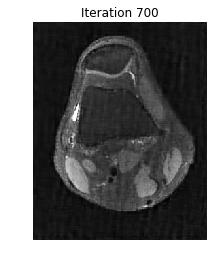

MSE Orig:  0.014688243615059628
MSE Corrupt:  0.004625130935281335


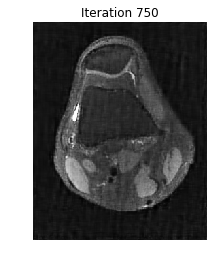

MSE Orig:  0.014660377126979457
MSE Corrupt:  0.0046640423768763645


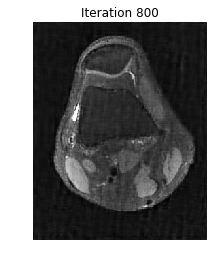

MSE Orig:  0.014898914740372114
MSE Corrupt:  0.004716910919717193


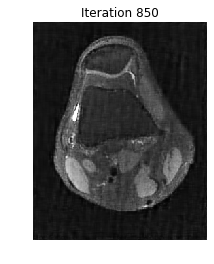

MSE Orig:  0.014464215723636997
MSE Corrupt:  0.004723188550111853


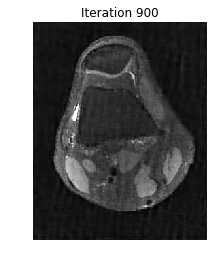

MSE Orig:  0.01533142617209482
MSE Corrupt:  0.004745632475896069


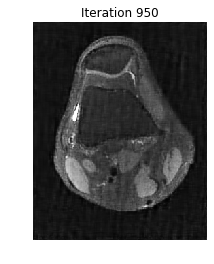

MSE Orig:  0.014892334419183898
MSE Corrupt:  0.004758751104683341


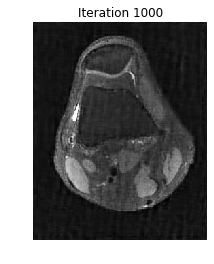

MSE Orig:  0.014797896355718373
MSE Corrupt:  0.0047130025992285635


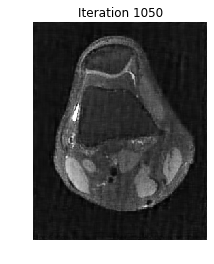

MSE Orig:  0.014301657622715088
MSE Corrupt:  0.004758437549120505


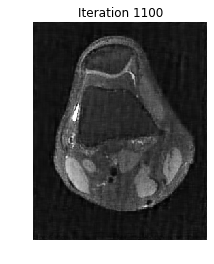

MSE Orig:  0.014805864922062095
MSE Corrupt:  0.004801511126840151


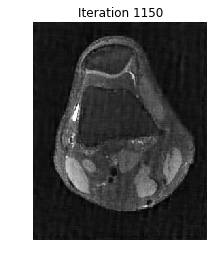

MSE Orig:  0.01468065234364846
MSE Corrupt:  0.004716340353456946


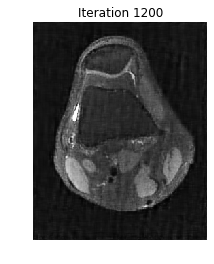

MSE Orig:  0.01454669020502014
MSE Corrupt:  0.004769549119638479


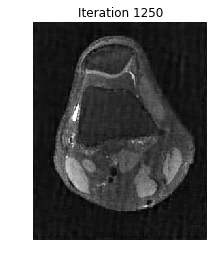

MSE Orig:  0.015141812700523094
MSE Corrupt:  0.004801148850684647


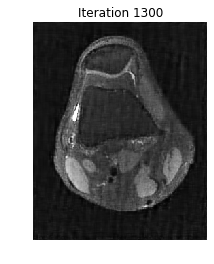

MSE Orig:  0.014623756356426713
MSE Corrupt:  0.004833311352044579


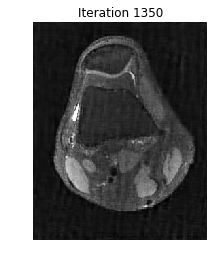

MSE Orig:  0.014754266775700612
MSE Corrupt:  0.004797990196682225


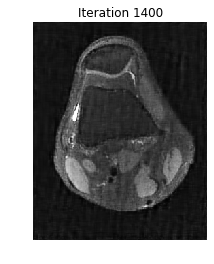

MSE Orig:  0.015098168850602492
MSE Corrupt:  0.004853013766729093


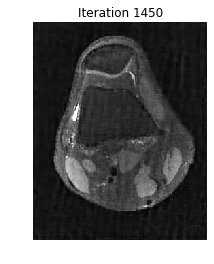

MSE Orig:  0.014554538916128606
MSE Corrupt:  0.004806618695628564


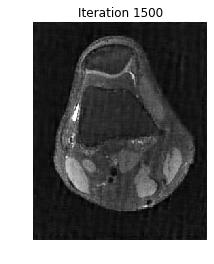

MSE Orig:  0.016396532085575424
MSE Corrupt:  0.005486098711928894


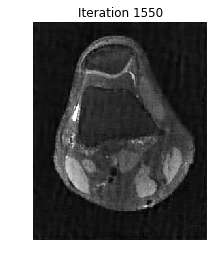

MSE Orig:  0.014651808278096068
MSE Corrupt:  0.004669302761070972


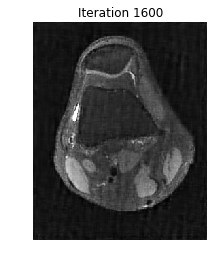

MSE Orig:  0.01467558934233959
MSE Corrupt:  0.004789399531430131


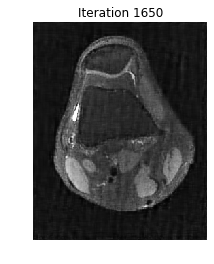

MSE Orig:  0.014711307193661562
MSE Corrupt:  0.004844637874888319


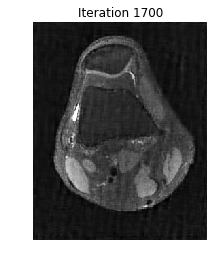

MSE Orig:  0.01683398197400588
MSE Corrupt:  0.00517345316360049


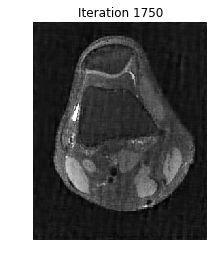

MSE Orig:  0.014856586610780324
MSE Corrupt:  0.004871462208334619


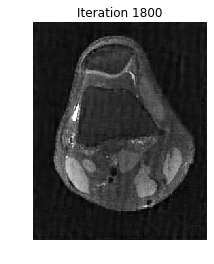

MSE Orig:  0.015941540594691602
MSE Corrupt:  0.005005574354639769


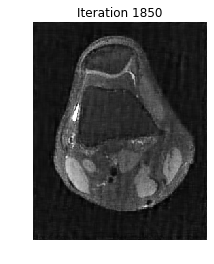

MSE Orig:  0.014519551116836931
MSE Corrupt:  0.0049382939211588634


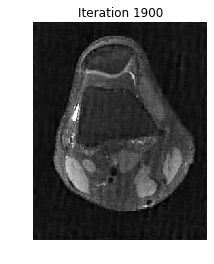

MSE Orig:  0.015043467000803588
MSE Corrupt:  0.004893007915564457


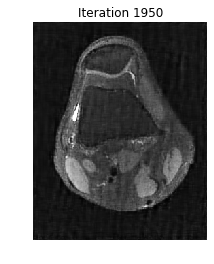

MSE Orig:  0.014881254895459481
MSE Corrupt:  0.004929041657551902


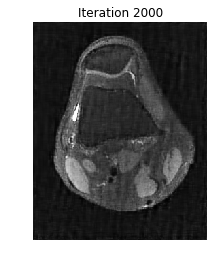

MSE Orig:  0.014465698743719932
MSE Corrupt:  0.004708072709973132


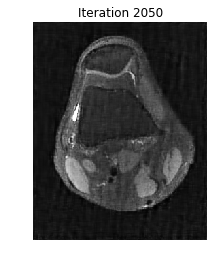

MSE Orig:  0.014844644061525233
MSE Corrupt:  0.0048853840895477715


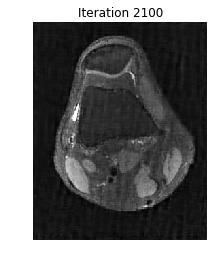

MSE Orig:  0.014775134612036875
MSE Corrupt:  0.004928146159278139


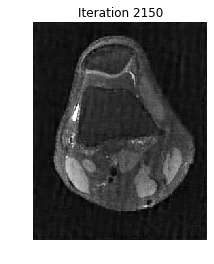

MSE Orig:  0.015111497159418433
MSE Corrupt:  0.004962563592484755


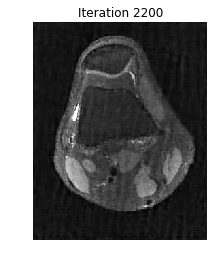

MSE Orig:  0.015385033843323995
MSE Corrupt:  0.004996300636773821


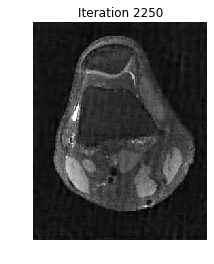

MSE Orig:  0.013845581978606336
MSE Corrupt:  0.004962108193011986


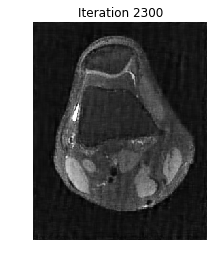

MSE Orig:  0.014859184926349491
MSE Corrupt:  0.004875981500256003


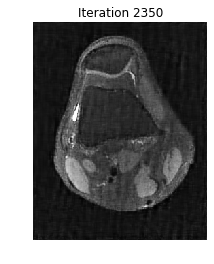

MSE Orig:  0.01513817768422108
MSE Corrupt:  0.005019900578055863


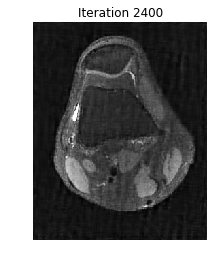

MSE Orig:  0.015124670109157658
MSE Corrupt:  0.005033034796750749


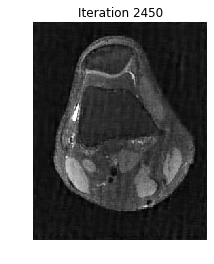

MSE Orig:  0.014869612334681297
MSE Corrupt:  0.0049358779353229874


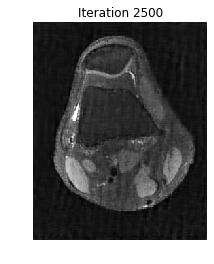

In [37]:
plt.axis('off')
plt.title('Iteration 0')
plt.imshow(base_image[0][:, :, 0], cmap='gray')
plt.show()
plt.imshow(corrupted_img_batch[0, :, :, 0], cmap='gray')
plt.show()
iterations = 50                  # in hundreds
results = np.empty(base_image.shape)

orig_errors = []
corrupt_errors = []

for i in range(iterations):
    fit_params['x'] += (.1) * (np.random.random(size = (1, ) + image_shape) * 2 - 1) if i < 20 else (.01) * (np.random.random(size = (1, ) + image_shape) * 2 - 1)
    autoencoder.fit(**fit_params)
    output = autoencoder.predict(base_image)
    results = np.append(results, output, axis=0)
    plt.axis('off')
    plt.title('Iteration '+ str((i+1)*fit_params['epochs']))
    orig_errors.append(((output - normalized_img)**2).mean(axis=None))
    corrupt_errors.append(((output - normalized_new_img)**2).mean(axis=None))
    print('MSE Orig: ', orig_errors[-1])
    print('MSE Corrupt: ', corrupt_errors[-1])
    plt.imshow(output[0][:, :, 0], cmap='gray')
    plt.show()

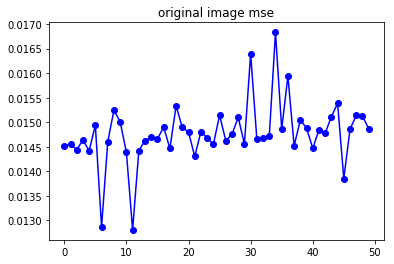

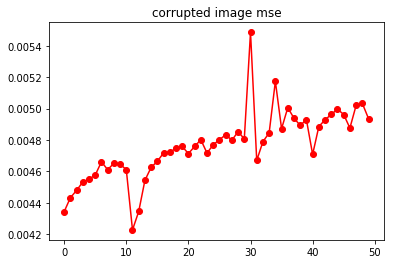

In [38]:
plt.plot(orig_errors, '-bo')
plt.title('original image mse')
plt.show()
plt.title('corrupted image mse')
plt.plot(corrupt_errors, '-ro')
plt.show()

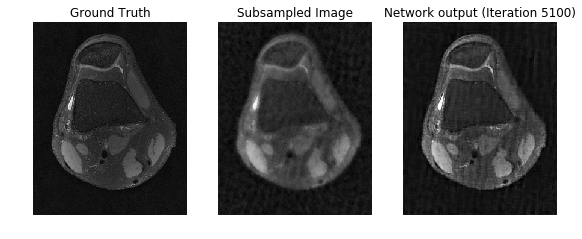

In [39]:
plt.figure(figsize=(16,6))
plt.subplot(151); plt.axis('off'); plt.title('Ground Truth'); plt.imshow(normalized_img[:, :, 0], cmap='gray')
plt.subplot(152); plt.axis('off'); plt.title('Subsampled Image'); plt.imshow(corrupted_img_batch[0, :, :, 0], cmap='gray')
i=50
plt.subplot(153); plt.axis('off'); plt.title('Network output (Iteration ' + str((i+1)*100) + ')'); plt.imshow(results[-1][:, :, 0], cmap='gray')
plt.show()
np.save('./deep_prior_data/recon_mixed_mae3', results)

NameError: name 'preproc_img' is not defined

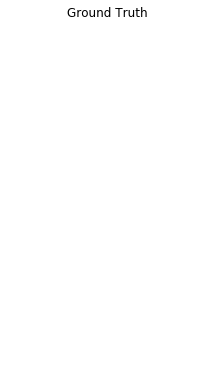

In [108]:
plt.figure(figsize=(16,6))
plt.subplot(151); plt.axis('off'); plt.title('Ground Truth'); plt.imshow(deprocess(preproc_img))
plt.subplot(152); plt.axis('off'); plt.title('Noisy Image'); plt.imshow(deprocess(corrupted_img))
i=50
plt.subplot(153); plt.axis('off'); plt.title('Network output (Iteration ' + str((i+1)*100) + ')'); plt.imshow(deprocess(results[i]))
plt.show()